In [1]:
import tensorflow as tf
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from os import getcwd
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16 ,(3,3) ,activation = 'relu' ,input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32 ,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 ,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 ,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 ,activation = 'relu'),
    tf.keras.layers.Dense(3 ,activation = 'softmax')
])

In [4]:
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [5]:
TRAINING_DIR = os.path.join(getcwd(),'training') 
train_datagen = ImageDataGenerator(rescale = 1./255 ,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
                TRAINING_DIR,
                target_size = (150,150),
                batch_size = 10,
                class_mode = 'categorical')

VALIDATION_DIR = os.path.join(getcwd(),'testing') 
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
                VALIDATION_DIR,
                target_size = (150,150),
                batch_size = 10,
                class_mode = 'categorical')

Found 4069 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [6]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 407 steps, validate for 8 steps
Epoch 1/10
407/407 [==============================] - 80s 197ms/step - loss: 0.2882 - acc: 0.9268 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 2/10
407/407 [==============================] - 62s 152ms/step - loss: 0.1617 - acc: 0.9663 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 3/10
407/407 [==============================] - 62s 152ms/step - loss: 0.1196 - acc: 0.9735 - val_loss: 0.0962 - val_acc: 0.9867
Epoch 4/10
407/407 [==============================] - 63s 154ms/step - loss: 0.1639 - acc: 0.9742 - val_loss: 0.0277 - val_acc: 0.9867
Epoch 5/10
407/407 [==============================] - 62s 154ms/step - loss: 0.1288 - acc: 0.9791 - val_loss: 0.2756 - val_acc: 0.9733
Epoch 6/10
407/407 [==============================] - 61s 150ms/step - loss: 0.1389 - acc: 0.9806 - val_loss: 9.6392e-05 - val_acc: 1.0000
Epoch 7/10
407/407

<Figure size 432x288 with 0 Axes>

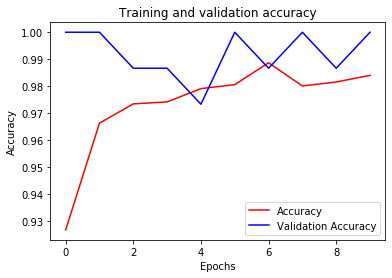

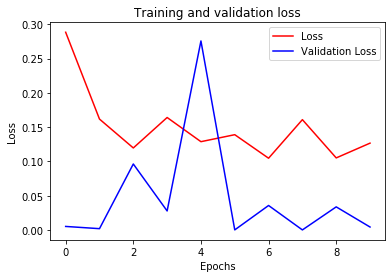

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [10]:
color_list = ['Blue' , 'Red' ,'Green']

In [11]:
def predict_class(model, images, show = True):
    for img in images:
        img = image.load_img(img, target_size=(150, 150))
        img = image.img_to_array(img)                    
        img = np.expand_dims(img, axis=0)         
        img /= 255.                                      

        pred = model.predict(img)
        index = np.argmax(pred)
        color_list.sort()
        pred_value = color_list[index]
        if show:
            plt.imshow(img[0])                           
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

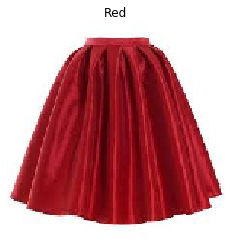

In [13]:
images = []
# images.append('1.png')
# images.append('2.jpg')
images.append('3.jpg')
predict_class(model, images, True)